# Tutoriel d'exemple de résolution d'un problème de machine learning

Ce notebook va vous guider à travers ce cas, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : la *Machine à vecteurs de support* (ou *SVM (Support Vector Machine)* en anglais). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

<font color="green">Quel est le problème que l'on veut résoudre ici ? Il faudrait peut-être parler un peu de ce que l'on cherche à faire (i.e. identifier des chiffres en écriture manuscrite)</font>

# Code

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Importation du dataset

In [2]:
digits = datasets.load_digits()

zip est une methode pour regrouper toutes les parametres mis entre parenthese comme un dictionnaire.

Dans cette partie nous lui donnons des exemples stocker dans le base de données pour qu'il puisse apprendre. 

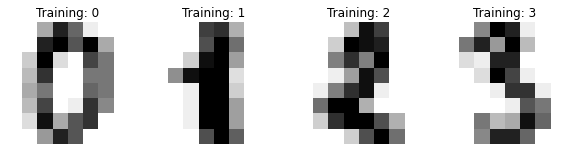

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Dans un premier temps on vectorise l'image pour la passer de 8*8 a un vecteur d'une taille 64.

Nous divisions le jeu de données en 2, 20 % pour s'entrainer et 80 % pour le test.

Directement apres cela nous testons notre méthode.

<font color="green">C'est plutôt bien expliqué, bien joué</font>

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Nous vérifions les résultats des prédictions, pour vérifier que le modeles fonctionne bien.

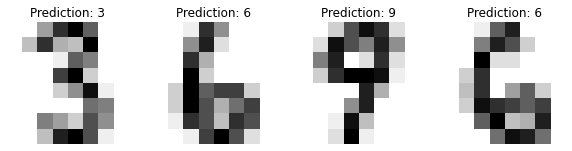

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438




Analyse des performance de notre modéle.

Confusion matrix:
[[139   0   0   0   1   0   0   0   0   0]
 [  0 105  18   0   0   1   4   0  13   3]
 [  0   0 131   2   0   0   0   0   0   8]
 [  0   0   2 110   0   3   0   2   4  24]
 [  0   0   0   0 142   0   0   1   0   4]
 [  0   0   0   0   2 134   1   0   0   9]
 [  2   1   0   0   0   0 139   0   3   0]
 [  0   0   0   0   0   0   0 131   1  12]
 [  0   3   2   0   0   1   0   0 122  12]
 [  0   8   0   0   0   1   0   2   2 133]]


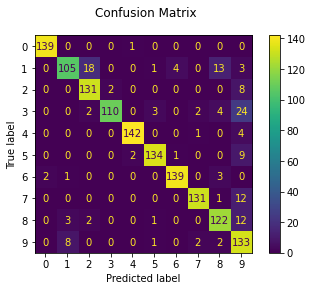

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !
<font color="green">Ce tutoriel n'est pas très long et plutôt bien expliqué, on arrive à comprendre où tu veux en venir. Attention à bien expliquer le problème à résoudre en début de tutoriel ! 🙂</font>